## Final Project Submission

Please fill out:
* Student name: Charles Ondieki Otwori
* Student pace: Part-time
* Scheduled project review date/time: September 11, 2024
* Instructor name:  William Okombo
* Blog post URL:https://public.tableau.com/views/Aviation-Project-2024/AviationaccidentsintheUSA?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link


### Project Overview

The purpose of this project is to use data cleaning, imputation, analysis, and visualization of the aviation accident dataset from 1960 to 2023 by the National Transport Safety Board to generate insights for a business stakeholder. The data set includes  aviation accidents and incidents in the United States and international waters. The analysis will identify the safest aircraft models, airports, and risk factors associated with aviation accident risks in the United States. The company will use this analysis to identify the aircraft and airports that carry the lowest risks of aviation accidents for investment purposes. 

### Business Problem 

The company is expanding to a new industry to diversify its portfolio. Commercial and private enterprises are interested in purchasing and operating airplanes. The company has not conducted any aviation business previously. Accidents have a big reputational and financial risk in the aviation business. The analysis will identify the risks, and conduct an aircraft evaluation and comparison to provide data-driven actionable insights. 


### Data 

The data set is publicly available from the National Transportation Safety Board website link: https://www.ntsb.gov/aviationdata/aircraftdata.html. The dataset contains 88,889 rows and 31 columns. It contains event and investigation details, location information, aircraft and flight details, injury and damage information, and report details. The data set selected to draw insights is 

### Questions to consider :
1. What are the risks related to aviation accidents and incidents in terms of Injury severity, aircraft damage, weather conditions, and flight phases 
2. Frequency of accidents across the different makes and models, focusing on injury severity, aircraft damage, and broad phase of flights 
3. Which aircraft models have the highest and lowest recorded accidents? 
4. What are the common types of damage associated with the aircraft 
5. How does the purpose of flight influence the risk profile of the various aircraft 



### Loading Python packages

In [1]:
# pandas for dat amnipulation and analysis
import pandas as pd 

# matplotlib and seaborn for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

#Numpy for workng with arrays 
import numpy as np
 

### Loading data

In [2]:
df = pd.read_csv('AviationData.csv', encoding='ISO-8859-1')

C:\Users\ondie\AppData\Local\Temp\ipykernel_15392\1074977489.py:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('AviationData.csv', encoding='ISO-8859-1')


In [3]:
# create  Copy of dataset 
df2=df.copy(deep = True)

In [4]:
## Data Understanding 

In [5]:
# Check the number of rows and columns: (88889, 31)
df.shape

(88889, 31)

In [6]:
#Checking the first 5 rows 
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [7]:
# Checking the last 5 
df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [8]:
#checking 5 random rows 
df.sample(5)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
18665,20001213X32193,Accident,NYC87LA248,1987-09-13,"BROOKLINE, NH",United States,NaN,NaN,NH16,BROOKLINE,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,Landing,Probable Cause,24-04-1989
25462,20001212X23070,Accident,ATL90LA112,1990-05-11,"CHAMBLEE, GA",United States,NaN,NaN,PDK,DEKALB-PEACHTREE,...,Instructional,NaN,0.0,0.0,0.0,2.0,VMC,Landing,Probable Cause,05-03-1993
13562,20001214X38328,Incident,ANC86IA010,1985-12-05,"KENAI, AK",United States,NaN,NaN,ENA,KENAI,...,Unknown,"South Central Air, Inc.",0.0,0.0,0.0,6.0,VMC,Landing,Probable Cause,NaN
29413,20001212X18506,Accident,NYC92FA025,1991-11-03,"NEWFIELD, NJ",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,VMC,Descent,Probable Cause,30-11-2007
56101,20040112X00049,Accident,ATL04LA065,2004-01-11,"ALLENDALE, SC",United States,32.990277,-81.268611,88J,ALLENDALE COUNTY,...,Personal,NaN,NaN,NaN,NaN,2.0,VMC,Takeoff,Probable Cause,28-04-2005


In [9]:
# checking the available 
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [10]:
# Cheking the details of the data set 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [11]:
#Checking the summary statistics for numerical columns 
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [12]:
#summary statistics for categorical 
df.describe(include=['object'])


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Amateur.Built,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
count,88889,88889,88889,88889,88837,88663,34382,34373,50132,52704,...,88787,81793,32023,12582,82697,16648,84397,61724,82505,75118
unique,87951,2,88863,14782,27758,219,25592,27156,10374,24870,...,2,12,31,3,26,13590,4,12,17074,2924
top,20001212X19172,Accident,CEN22LA149,1984-06-30,"ANCHORAGE, AK",United States,332739N,0112457W,NONE,Private,...,No,Reciprocating,091,NSCH,Personal,Pilot,VMC,Landing,Probable Cause,25-09-2020
freq,3,85015,2,25,434,82248,19,24,1488,240,...,80312,69530,18221,4474,49448,258,77303,15428,61754,17019


### Data Cleaning

In [13]:
# Getting to know more about the dataset by accessing its information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [14]:
# checking the missing values in each column 
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

In [15]:
# Preview data
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


Converting data types 

In [16]:
df.dtypes

Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Latitude                   object
Longitude                  object
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Schedule                   object
Purpose.of.flight          object
Air.carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
Report.Status 

In [17]:
df['Number.of.Engines']= df['Number.of.Engines'].astype('float')

In [18]:
df['Total.Fatal.Injuries'] = df['Total.Fatal.Injuries'].astype('float')

In [19]:
#checking the data types 
df.dtypes

Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Latitude                   object
Longitude                  object
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Schedule                   object
Purpose.of.flight          object
Air.carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
Report.Status 

Dropping columns 

In [20]:
#Dropping columns with more than 50% missing values and not important in analysis
df.drop(['Latitude', 'Longitude','FAR.Description'],inplace= True, axis=1)

In [21]:
# Dropping additional columns not important for analysis purposes
df.drop(['Accident.Number','Airport.Code','Registration.Number', 'Publication.Date','Report.Status'],inplace= True, axis=1)

Missing categorical data 

In [22]:
# Replacing missing values with Unknown
df['Location'].fillna('Unknown', inplace=True)
df['Country'].fillna('Unknown', inplace=True)
df['Airport.Name'].fillna('Unknown', inplace=True)
df['Injury.Severity'].fillna('Unknown', inplace=True)
df['Aircraft.damage'].fillna('Unknown', inplace=True)
df['Aircraft.Category'].fillna('Unknown', inplace=True)
df['Amateur.Built'].fillna('Unknown', inplace=True)
df['Purpose.of.flight'].fillna('Unknown', inplace=True)
df['Weather.Condition'].fillna('Unknown', inplace=True)
df['Air.carrier'].fillna('Unknown', inplace=True)
df['Make'].fillna('Unknown', inplace=True)
df['Model'].fillna('Unknown', inplace=True)
df['Engine.Type'].fillna('Unknown', inplace=True)
df['Broad.phase.of.flight'].fillna('Unknown', inplace=True)
df['Schedule'].fillna('Unknown', inplace=True)

Missing numerical data 

In [23]:
df['Number.of.Engines'].mean()

1.1465853511261397

In [24]:
df['Number.of.Engines'].mode()

0    1.0
Name: Number.of.Engines, dtype: float64

In [25]:
df['Total.Uninjured'].mean()

5.325439579642552

In [26]:
df['Total.Uninjured'].mode()

0    0.0
Name: Total.Uninjured, dtype: float64

In [27]:
#Replacing the missing values with mode.There is left skew distribution and outliers 

df['Number.of.Engines'].fillna(df['Number.of.Engines'].mode()[0], inplace=True)
df['Total.Serious.Injuries'].fillna(df['Total.Serious.Injuries'].mode()[0], inplace=True)
df['Total.Fatal.Injuries'].fillna(df['Total.Fatal.Injuries'].mode()[0], inplace=True)
df['Total.Minor.Injuries'].fillna(df['Total.Minor.Injuries'].mode()[0], inplace=True)
df['Total.Uninjured'].fillna(df['Total.Uninjured'].mode()[0], inplace=True)


In [28]:
#checking missing values
df.isna().sum()

Event.Id                  0
Investigation.Type        0
Event.Date                0
Location                  0
Country                   0
Airport.Name              0
Injury.Severity           0
Aircraft.damage           0
Aircraft.Category         0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Schedule                  0
Purpose.of.flight         0
Air.carrier               0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
dtype: int64

Handling Inconsistent data 

In [29]:
#Stripping the leading and trailing spaces 
df.columns = df.columns.str.strip()

In [30]:
#Checking the unique values in the Make column 
df['Make'].value_counts()

Make
Cessna             22227
Piper              12029
CESSNA              4922
Beech               4330
PIPER               2841
                   ...  
Leonard Walters        1
Maule Air Inc.         1
Motley Vans            1
Perlick                1
ROYSE RALPH L          1
Name: count, Length: 8237, dtype: int64

In [31]:
df['Make']= df['Make'].str.upper()

In [32]:
df['Make'].value_counts()

Make
CESSNA           27149
PIPER            14870
BEECH             5372
BOEING            2745
BELL              2722
                 ...  
COHEN                1
KITCHENS             1
LUTES                1
IZATT                1
ROYSE RALPH L        1
Name: count, Length: 7587, dtype: int64

In [33]:
df['Make'] = df['Make'].replace(to_replace=r'\b(?:CES\S*|CESNA AIRCRAFT)\b', value='CESSNA', regex=True)

In [34]:
df['Make'].value_counts()

Make
CESSNA                   27151
PIPER                    14870
BEECH                     5372
BOEING                    2745
BELL                      2722
                         ...  
BOYKIN B J                   1
BENSEN AIRCRAFT CORP.        1
STEEN AERO LAB               1
CAP                          1
ROYSE RALPH L                1
Name: count, Length: 7585, dtype: int64

In [35]:
df['Model'].value_counts()

Model
152              2367
172              1756
172N             1164
PA-28-140         932
150               829
                 ... 
GC-1-A              1
737-3S3             1
MBB-BK117-B2        1
GLASSAIR GL25       1
M-8 EAGLE           1
Name: count, Length: 12318, dtype: int64

In [36]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Event.Date', 'Location', 'Country',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Make', 'Model', 'Amateur.Built',
       'Number.of.Engines', 'Engine.Type', 'Schedule', 'Purpose.of.flight',
       'Air.carrier', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight'],
      dtype='object')

Handling duplicates 

In [37]:
#check duplicates in the data
df.duplicated().sum()

24

In [38]:
# removing duplicates 
df.drop_duplicates(inplace=True)

In [39]:
df.duplicated().sum()

0

Cleaning Location information

In [40]:
# splitting the Location to extrext the state code 
df['State_Code']=df['Location'].str.split(',').str[-1].str.strip()

In [41]:
#Filling the missing state codes with unknown 
df['State_Code'].fillna('Unknown', inplace=True)

In [42]:
df['State_Code'].value_counts()

State_Code
CA                   8854
TX                   5912
FL                   5821
AK                   5672
AZ                   2831
                     ... 
ROTA ISLAND             1
St Lucia                1
CHUUK ISLAND            1
CAMERON 278B            1
Wallis and Futuna       1
Name: count, Length: 529, dtype: int64

Formatting the date 

In [43]:
#Converting Event.date into the date format
df['Event.Date'] = pd.to_datetime(df['Event.Date'])
df['Year'] = df['Event.Date'].dt.year
df['Month'] = df['Event.Date'].dt.month_name()
df['Day'] = df['Event.Date'].dt.day_name()
print(df[['Event.Date', 'Year', 'Month', 'Day']].head())

  Event.Date  Year    Month       Day
0 1948-10-24  1948  October    Sunday
1 1962-07-19  1962     July  Thursday
2 1974-08-30  1974   August    Friday
3 1977-06-19  1977     June    Sunday
4 1979-08-02  1979   August  Thursday


In [44]:
df['Injury.Severity'].value_counts()

Injury.Severity
Non-Fatal     67345
Fatal(1)       6166
Fatal          5262
Fatal(2)       3706
Incident       2217
              ...  
Fatal(80)         1
Fatal(217)        1
Fatal(169)        1
Fatal(88)         1
Fatal(189)        1
Name: count, Length: 110, dtype: int64

Removing nonnumeric entries in numeric column

In [45]:
#Removing nonnumeric entries in Injury.Severity column
df['Injury.Severity'] = df['Injury.Severity'].astype(str).str.extract('(\d+)').astype(str)

In [46]:
df['Injury.Severity'].value_counts()

Injury.Severity
nan    76309
1       6166
2       3706
3       1147
4        810
       ...  
88         1
156        1
60         1
30         1
57         1
Name: count, Length: 104, dtype: int64

In [47]:
df['Total.Fatal.Injuries'].value_counts()

Total.Fatal.Injuries
0.0      71060
1.0       8882
2.0       5168
3.0       1589
4.0       1101
         ...  
156.0        1
68.0         1
31.0         1
115.0        1
176.0        1
Name: count, Length: 125, dtype: int64

In [48]:
#Removing nonnumeric entries in numeric column
df['Total.Fatal.Injuries'] = pd.to_numeric(df['Total.Fatal.Injuries'], errors='coerce')

In [49]:
df['Total.Fatal.Injuries'].value_counts()

Total.Fatal.Injuries
0.0      71060
1.0       8882
2.0       5168
3.0       1589
4.0       1101
         ...  
156.0        1
68.0         1
31.0         1
115.0        1
176.0        1
Name: count, Length: 125, dtype: int64

In [50]:
# Confirming missing values are handled 
df.isna().sum()

Event.Id                  0
Investigation.Type        0
Event.Date                0
Location                  0
Country                   0
Airport.Name              0
Injury.Severity           0
Aircraft.damage           0
Aircraft.Category         0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Schedule                  0
Purpose.of.flight         0
Air.carrier               0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
State_Code                0
Year                      0
Month                     0
Day                       0
dtype: int64

In [51]:
# Replace all variations of 'Private Airstrip' with a consistent name 'Private Airstrip'
df['Airport.Name'] = df['Airport.Name'].replace(['Private', 'Private Airstrip', 'PVT', 'Private strip', 'PRIVATE', 'PRIVATE STRIP','Private Airstrip Airstrip','Private Airstrip Strip','Private Airstrip STRIP', 'Private Airstrip Airstrip','Private Airstrip Airstrip Strip','Public Airstrip Airstrip STRIP'], 'Private Airstrip',regex=True)

In [52]:
df.head()

,Event.Id,Investigation.Type,Event.Date,Location,Country,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,State_Code,Year,Month,Day
0,20001218X45444,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Unknown,2,Destroyed,Unknown,STINSON,...,2.0,0.0,0.0,0.0,UNK,Cruise,ID,1948,October,Sunday
1,20001218X45447,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Unknown,4,Destroyed,Unknown,PIPER,...,4.0,0.0,0.0,0.0,UNK,Unknown,CA,1962,July,Thursday
2,20061025X01555,Accident,1974-08-30,"Saltville, VA",United States,Unknown,3,Destroyed,Unknown,CESSNA,...,3.0,0.0,0.0,0.0,IMC,Cruise,VA,1974,August,Friday
3,20001218X45448,Accident,1977-06-19,"EUREKA, CA",United States,Unknown,2,Destroyed,Unknown,ROCKWELL,...,2.0,0.0,0.0,0.0,IMC,Cruise,CA,1977,June,Sunday
4,20041105X01764,Accident,1979-08-02,"Canton, OH",United States,Unknown,1,Destroyed,Unknown,CESSNA,...,1.0,2.0,0.0,0.0,VMC,Approach,OH,1979,August,Thursday


### Exploratory data analysis 

Checking the summary statistics for numerical columns 

In [53]:
df.describe()

,Event.Date,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Year
count,88865,88865.000000,88865.000000,88865.000000,88865.000000,88865.000000,88865.000000
mean,1999-09-18 00:48:20.255443840,1.136533,0.564699,0.240522,0.309177,4.968188,1999.207506
min,1948-10-24 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,1948.000000
25%,1989-01-15 00:00:00,1.000000,0.000000,0.000000,0.000000,0.000000,1989.000000
50%,1998-07-18 00:00:00,1.000000,0.000000,0.000000,0.000000,1.000000,1998.000000
75%,2009-07-02 00:00:00,1.000000,0.000000,0.000000,0.000000,2.000000,2009.000000
max,2022-12-29 00:00:00,8.000000,349.000000,161.000000,380.000000,699.000000,2022.000000
std,NaN,0.432550,5.127298,1.434789,2.083987,26.992800,11.888407


Summary statistics for categorical columns

In [54]:
df.describe(include=['object'])

,Event.Id,Investigation.Type,Location,Country,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Engine.Type,Schedule,Purpose.of.flight,Air.carrier,Weather.Condition,Broad.phase.of.flight,State_Code,Month,Day
count,88865,88865,88865,88865,88865,88865,88865,88865,88865,88865,88865,88865,88865,88865,88865,88865,88865,88865,88865,88865
unique,87951,2,27758,219,24857,104,4,15,7585,12318,3,12,4,26,13590,5,12,529,12,7
top,20001212X19172,Accident,"ANCHORAGE, AK",United States,Unknown,nan,Substantial,Unknown,CESSNA,152,No,Reciprocating,Unknown,Personal,Unknown,VMC,Unknown,CA,July,Saturday
freq,3,84994,434,82226,36180,76309,64134,56597,27146,2365,80289,69515,76288,49444,72234,77281,27710,8854,10696,16666


Univariate Analysis for categorical variables 

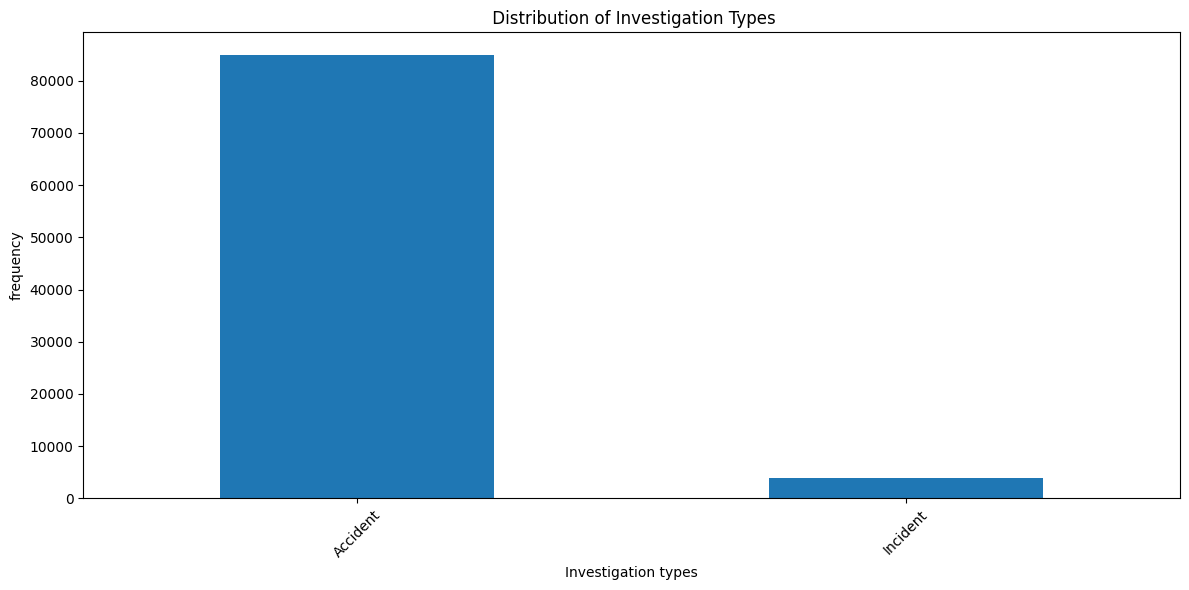

In [55]:
# Distribution of Investigation types  
fig, axes = plt.subplots(figsize=(12, 6))
 
#Plotting bar plot for Distribution of investigation type
df['Investigation.Type'].value_counts().plot(kind = 'bar',ax=axes, grid=False)

# Clean up the labels
axes.set_xticklabels([label.strip("(),'") for label in df['Investigation.Type'].value_counts().index])

axes.set_title(' Distribution of Investigation Types')
axes.set_xlabel('Investigation types')
axes.set_ylabel('frequency')
axes.tick_params(axis='x', rotation=45)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

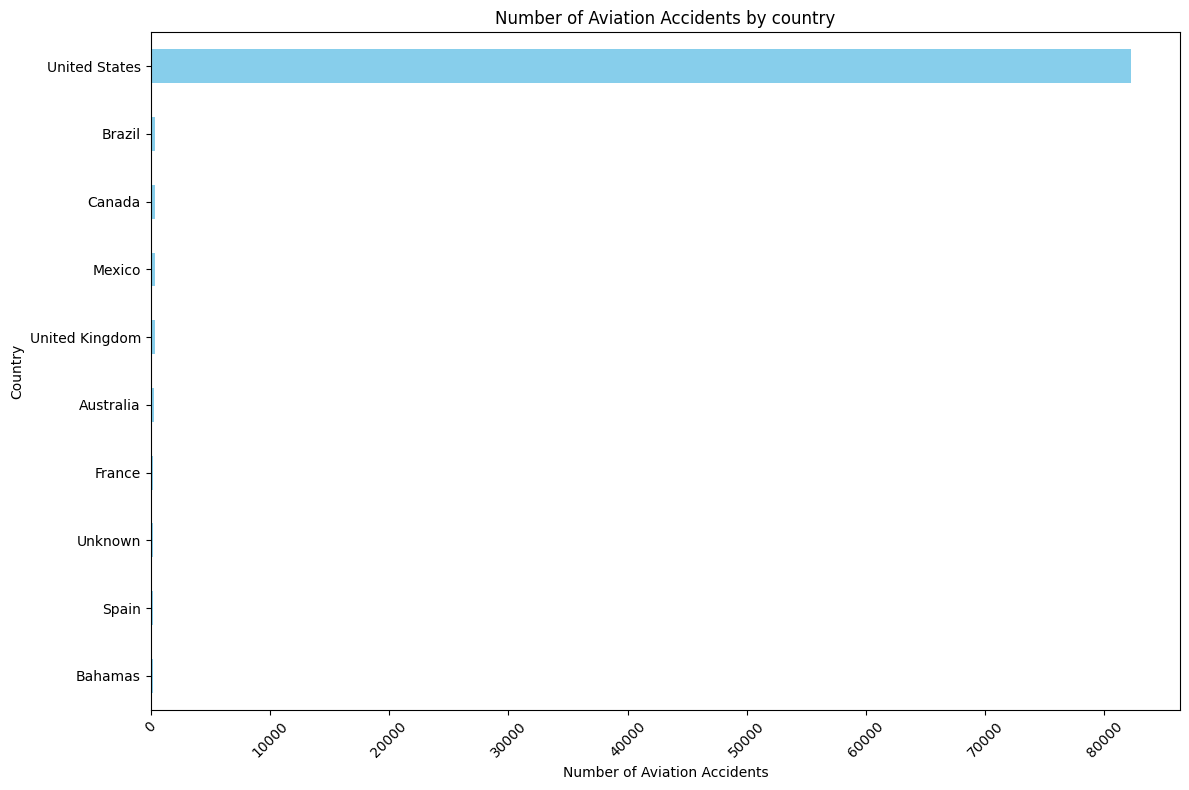

In [56]:
# Plotting the number of aviation accident per country
fig, axes = plt.subplots(figsize=(12, 8))

#plot  Aviation Accidents by year 
Accident_countries=df['Country'].value_counts().head(10)
Accident_countries.plot(kind='barh', ax=axes, color='skyblue')
axes.set_title('Number of Aviation Accidents by country')
axes.set_xlabel('Number of Aviation Accidents')
axes.set_ylabel('Country')
axes.tick_params(axis='x', rotation=45)

# Inverting the Y-axis to show the most frequent country on top 
axes.invert_yaxis()

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

Further analysis will focus on only accidents occuring in the United States of America . It will also focus on only aircrafts.The rationale of choice of only USA is because the majority of the reports are in USA . This will also form part of market analysis for starting the new venture in USA and expanding to the rest of the world . The company is interested operating aircrafts. Incidents will also be filtered out.  The analysis will also focus on Airplanes and helicopters only.

In [57]:
# Filter to include only records from the USA and aircrafts
usa_aircraft_df = df[(df['Country'] == 'United States') & (df['Make'].notnull())]

# Filter to include only accidents (excluding incidents)
usa_accidents_df = usa_aircraft_df[usa_aircraft_df['Investigation.Type'] == 'Accident']

#Filter to include only helicopters and airplanes
usa_accidents_df = usa_accidents_df[usa_accidents_df['Aircraft.Category'].isin(['Helicopter', 'Airplane'])]


In [58]:
usa_accidents_df.shape

(26324, 27)

In [59]:
# Save the DataFrame to a CSV file
usa_accidents_df.to_csv('usa_accidents.csv', index=False)

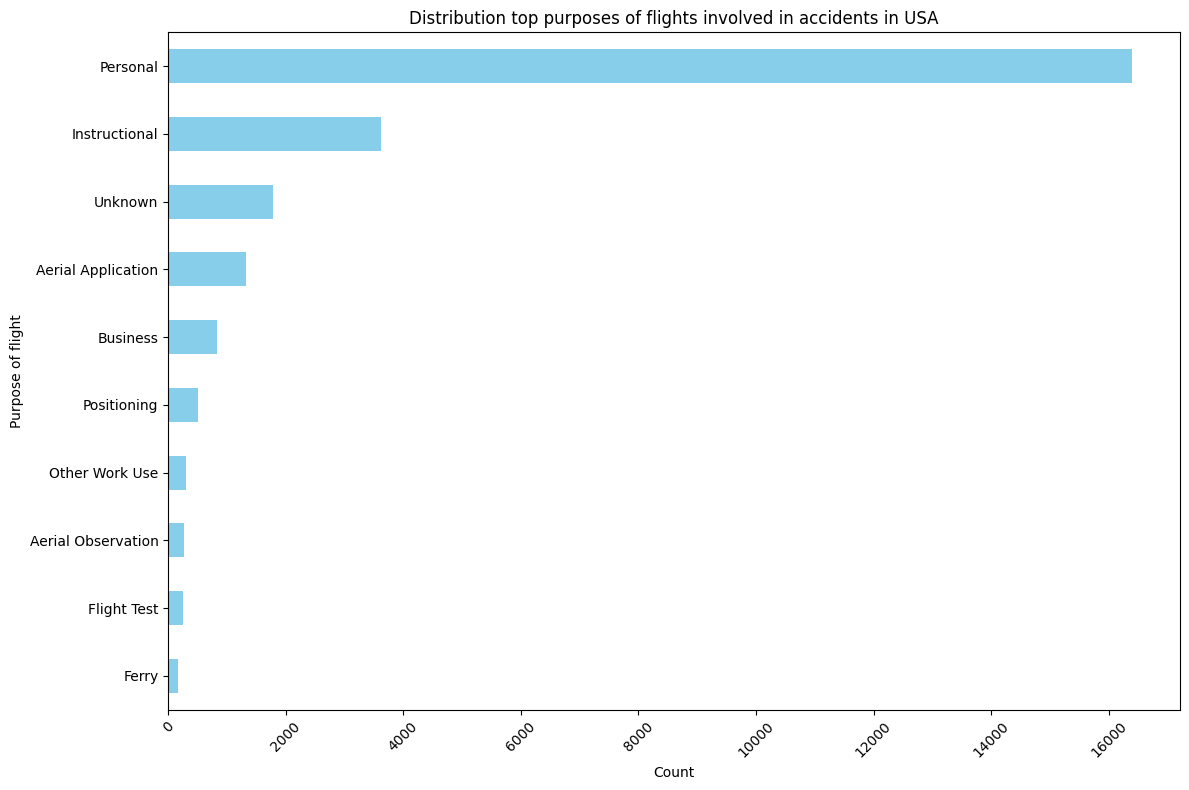

In [60]:
# Plotting the distribution top 10 purposes of flights involved in accidents in the USA  
fig, axes = plt.subplots(figsize=(12, 8))

#plot of schedule  
Accident_purpose=usa_accidents_df['Purpose.of.flight'].value_counts().head(10)

Accident_purpose.plot(kind='barh', ax=axes, color='skyblue')
axes.set_title('Distribution top purposes of flights involved in accidents in USA')
axes.set_xlabel('Count')
axes.set_ylabel('Purpose of flight')
axes.tick_params(axis='x', rotation=45)

# Inverting the Y-axis to show the most frequent purpose at the top
axes.invert_yaxis()


# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

Weather condition in the data set is describes as IMC and VMC. IMC is Instrument Metriological Condition. IMC occurs when there is poor visibility and the pilot uses Instrument Flight Rules(IFR). VMC is visual Metriological condition . VMC occurs when there is good visibility and the pilot uses Visual Flight Rules (VFR)

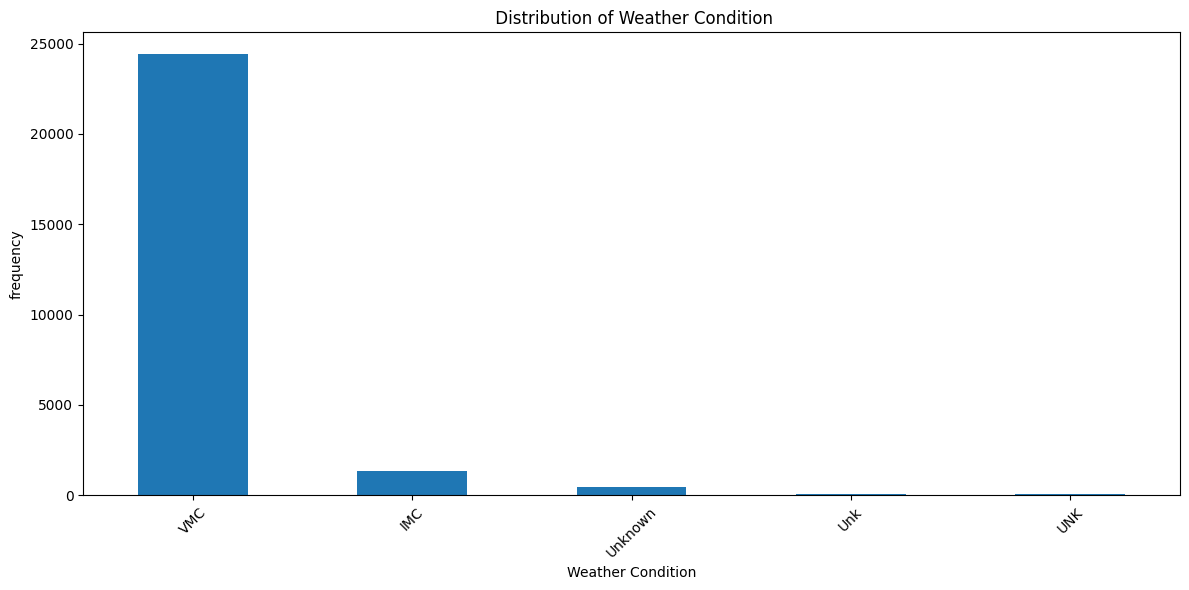

In [61]:
#Distribution of  weather condition values  
fig, axes = plt.subplots(figsize=(12, 6))
 
#Plotting bar plot for Weather.Condition
usa_accidents_df['Weather.Condition'].value_counts().plot(kind = 'bar',ax=axes, grid=False)

# Clean up the labels
axes.set_xticklabels([label.strip("(),'") for label in usa_accidents_df['Weather.Condition'].value_counts().index])
axes.set_title(' Distribution of Weather Condition')
axes.set_xlabel('Weather Condition')
axes.set_ylabel('frequency')
axes.tick_params(axis='x', rotation=45)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


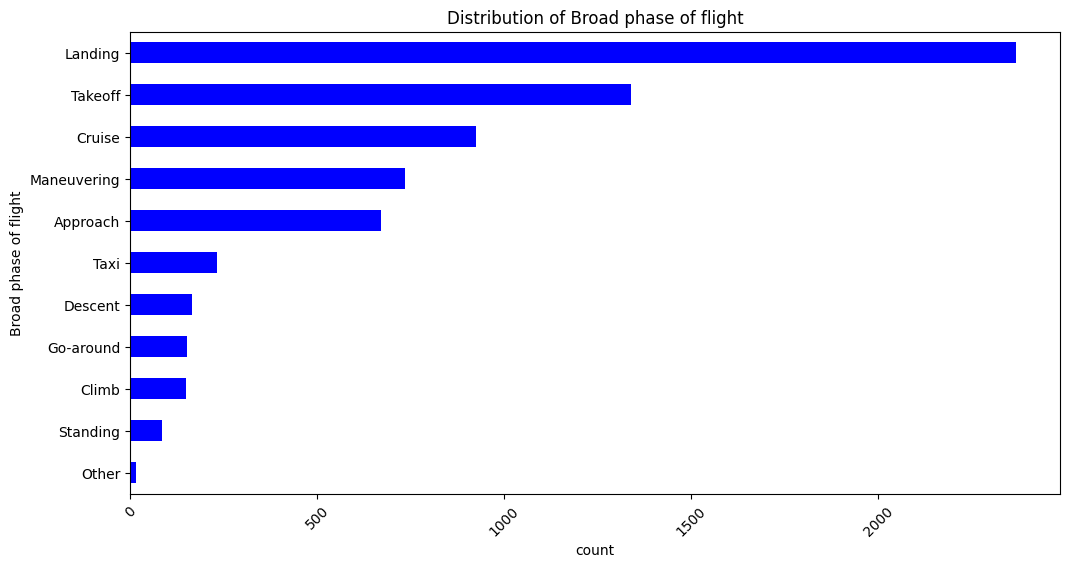

In [62]:
#Filter out 'Unknown' from 'Broad phase of flight'
df_phase_filtered = usa_accidents_df[usa_accidents_df['Broad.phase.of.flight'] != 'Unknown']

# Count the occurrences for the 'Broad phase of flight'
df_phase_counts = df_phase_filtered['Broad.phase.of.flight'].value_counts()

# Plotting the bar plot
fig, axes = plt.subplots(figsize=(12, 6))

df_phase_counts.plot(kind='barh', ax=axes, color='blue', grid=False)

# Set title and labels
axes.set_title('Distribution of Broad phase of flight')
axes.set_xlabel('count')
axes.set_ylabel('Broad phase of flight')

# Inverting the Y-axis to show the most frequent broad phase of flight at the top 
axes.invert_yaxis()

# Adjust tick rotation
axes.tick_params(axis='x', rotation=45)


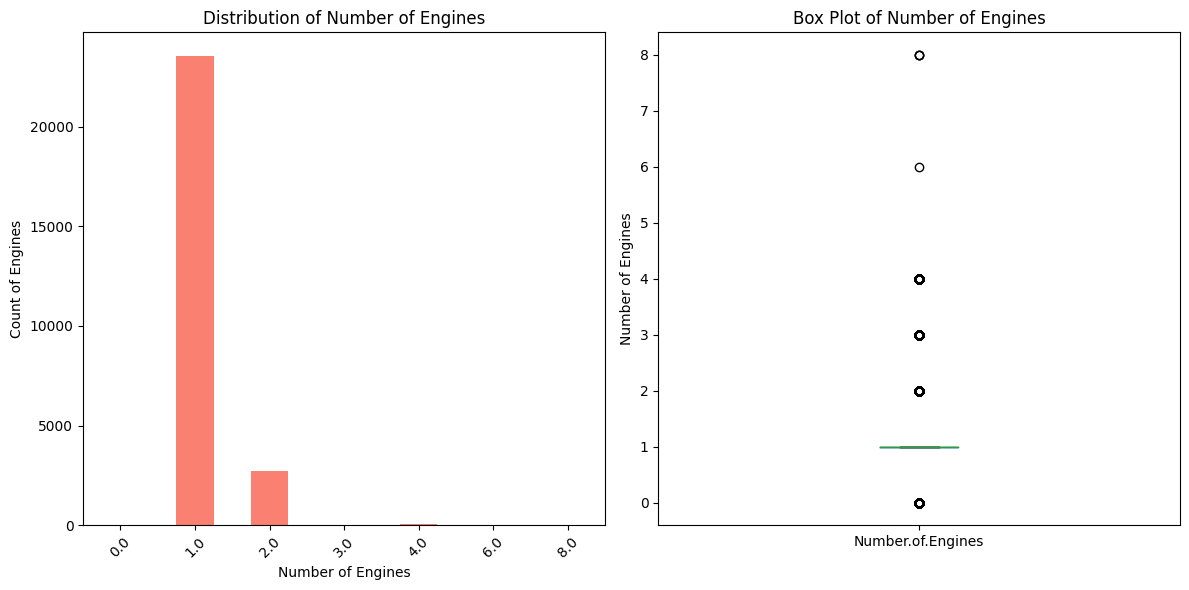

In [63]:
#Creating a figure with two subplots (one for bar and one for box plot for number of Engines)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plotting Bar graph for Number of Engines
usa_accidents_df['Number.of.Engines'].value_counts().sort_index().plot(kind='bar', ax=axes[0], color='salmon', grid=False)

# Clean up the labels
axes[0].set_xticklabels([str(label).strip("(),'") for label in usa_accidents_df['Number.of.Engines'].value_counts().sort_index().index])

axes[0].set_title('Distribution of Number of Engines')
axes[0].set_xlabel('Number of Engines')
axes[0].set_ylabel('Count of Engines')

# Adjust tick rotation
axes[0].tick_params(axis='x', rotation=45)

# Plotting box plot for Number of Engines
df[['Number.of.Engines']].boxplot(ax=axes[1], grid=False)
axes[1].set_title('Box Plot of Number of Engines')
axes[1].set_ylabel('Number of Engines')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

# Adjust tick rotation
axes[0].tick_params(axis='x', rotation=45)

In [64]:
print(usa_accidents_df[['Total.Serious.Injuries', 'Total.Fatal.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']].dtypes)


Total.Serious.Injuries    float64
Total.Fatal.Injuries      float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
dtype: object


In [65]:
#Convert the 'Total.Fatal.Injuries' column to float
usa_accidents_df['Total.Fatal.Injuries'] = pd.to_numeric(usa_accidents_df['Total.Fatal.Injuries'], errors='coerce')

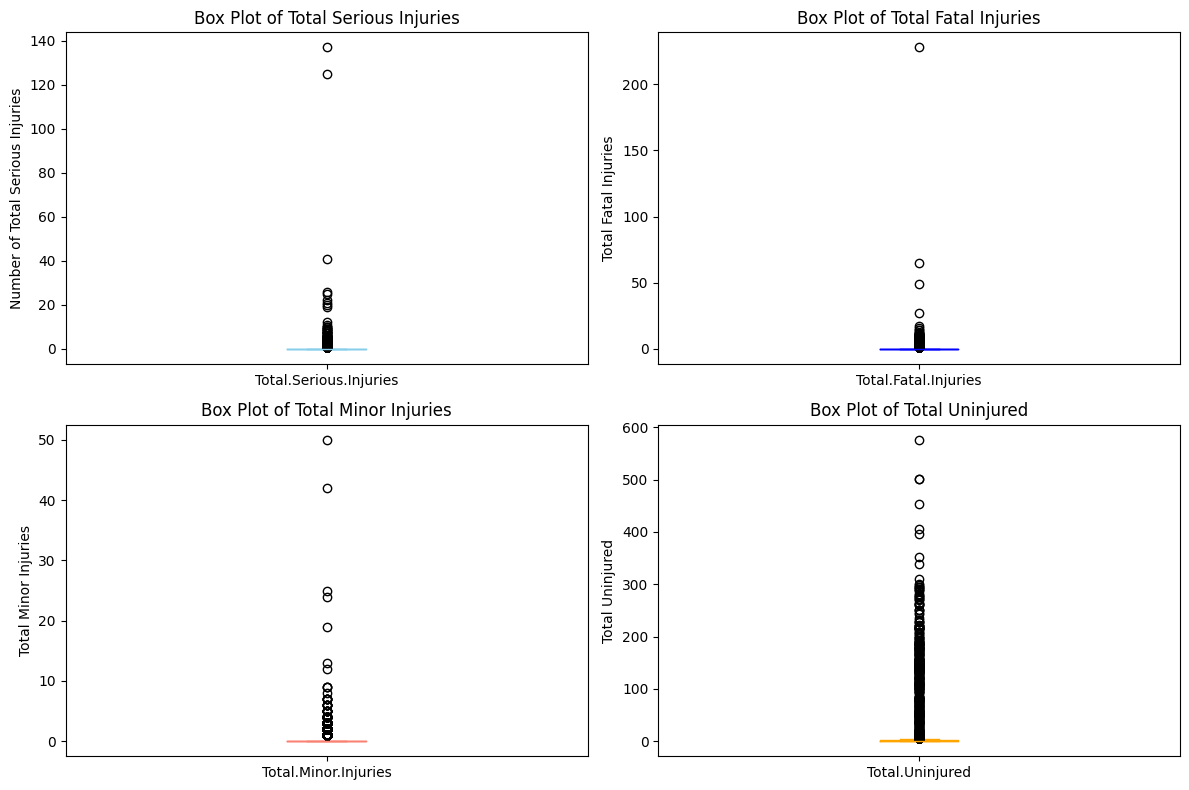

In [66]:
#Creating box plots for the various aviation accident injuries 

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plotting box plot for Total Serious Injuries
usa_accidents_df[['Total.Serious.Injuries']].boxplot(ax=axes[0, 0], grid=False, color='skyblue')
axes[0, 0].set_title('Box Plot of Total Serious Injuries')
axes[0, 0].set_ylabel('Number of Total Serious Injuries')

# Plotting box plot for Total Fatal Injuries
usa_accidents_df[['Total.Fatal.Injuries']].boxplot(ax=axes[0, 1], grid=False, color='blue')
axes[0, 1].set_title('Box Plot of Total Fatal Injuries')
axes[0, 1].set_ylabel('Total Fatal Injuries')

# Plotting box plot forTotal MinorI njuries
usa_accidents_df[['Total.Minor.Injuries']].boxplot(ax=axes[1, 0], grid=False, color='salmon')
axes[1, 0].set_title('Box Plot of Total Minor Injuries')
axes[1, 0].set_ylabel('Total Minor Injuries')

usa_accidents_df[['Total.Uninjured']].boxplot(ax=axes[1, 1], grid=False, color='orange')
axes[1, 1].set_title('Box Plot of Total Uninjured')
axes[1, 1].set_ylabel('Total Uninjured')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

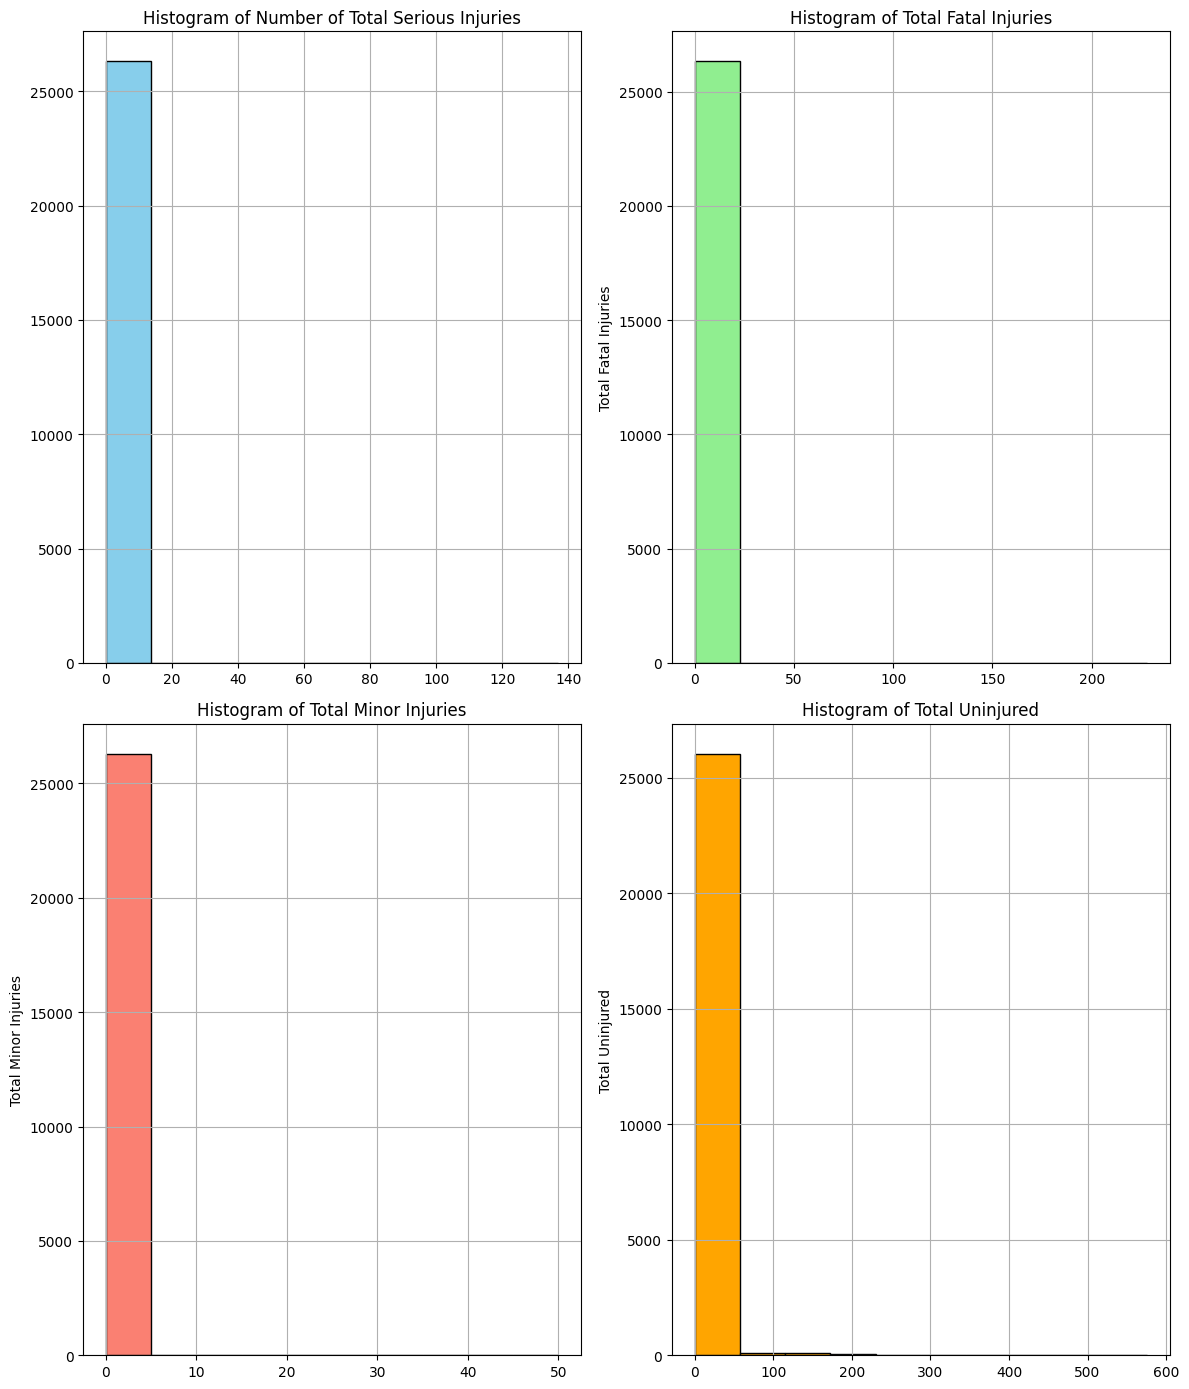

In [67]:
#Creating histogram for the various aviation injuries 

fig, axes = plt.subplots(2, 2, figsize=(12, 14))

# Plotting box plot for Total Serious Injuries
usa_accidents_df[['Total.Serious.Injuries']].hist(ax=axes[0, 0], bins =10, edgecolor = 'black', color='skyblue')
axes[0, 0].set_title('Histogram of Number of Total Serious Injuries')

# Plotting box plot for Total Fatal Injuries
usa_accidents_df[['Total.Fatal.Injuries']].hist(ax=axes[0, 1], bins =10, edgecolor = 'black', color='lightgreen')
axes[0, 1].set_title('Histogram of Total Fatal Injuries')
axes[0, 1].set_ylabel('Total Fatal Injuries')

# Plotting box plot forTotal MinorI njuries
usa_accidents_df[['Total.Minor.Injuries']].hist(ax=axes[1, 0], bins =10, edgecolor = 'black', color='salmon')
axes[1, 0].set_title('Histogram of Total Minor Injuries')
axes[1, 0].set_ylabel('Total Minor Injuries')

# Plotting box plot for Total Uninjured
usa_accidents_df[['Total.Uninjured']].hist(ax=axes[1, 1], bins =10, edgecolor = 'black', color='orange')
axes[1, 1].set_title('Histogram of Total Uninjured')
axes[1, 1].set_ylabel('Total Uninjured')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

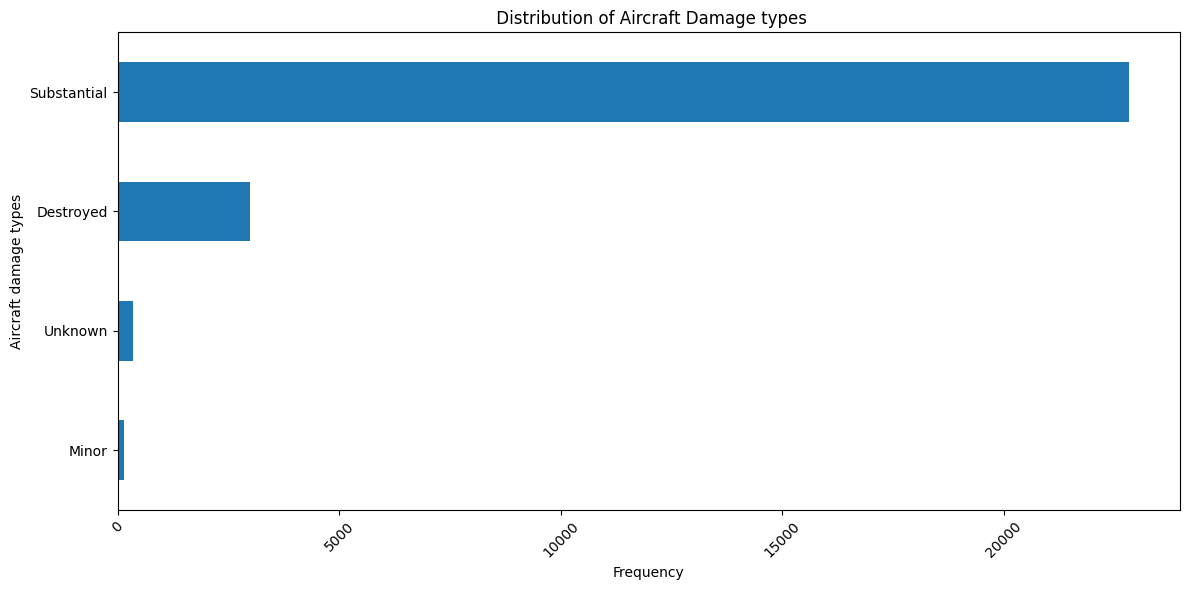

In [68]:
# Distribution of Aircraft damage  
fig, axes = plt.subplots(figsize=(12, 6))
 
#Plotting bar plot for Distribution of Aircraft Damage
usa_accidents_df['Aircraft.damage'].value_counts().plot(kind = 'barh',ax=axes, grid=False)

axes.set_title(' Distribution of Aircraft Damage types')
axes.set_xlabel('Frequency')
axes.set_ylabel('Aircraft damage types')
axes.tick_params(axis='x', rotation=45)

# Inverting the Y-axis to show the most frequent Aircraft damage type on the top
axes.invert_yaxis()

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

#### Bivariate analysis 

 Number of Accidents Across years , months and weekdays 

In [69]:
usa_accidents_df['Investigation.Type'].value_counts()

Investigation.Type
Accident    26324
Name: count, dtype: int64

In [70]:
#Grouping and counting per year 
Accidents_by_Year= usa_accidents_df.groupby('Year').size()
Accidents_by_Month= usa_accidents_df.groupby('Month').size()
Accidents_by_Day = usa_accidents_df.groupby('Day').size()

#Reindexing 
# Order the months and weekdays correctly
Accidents_by_Month = Accidents_by_Month.reindex(['January','February','March','April','May','June','July','August','September', 'October','November','December'])
Accidents_by_Day = Accidents_by_Day.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

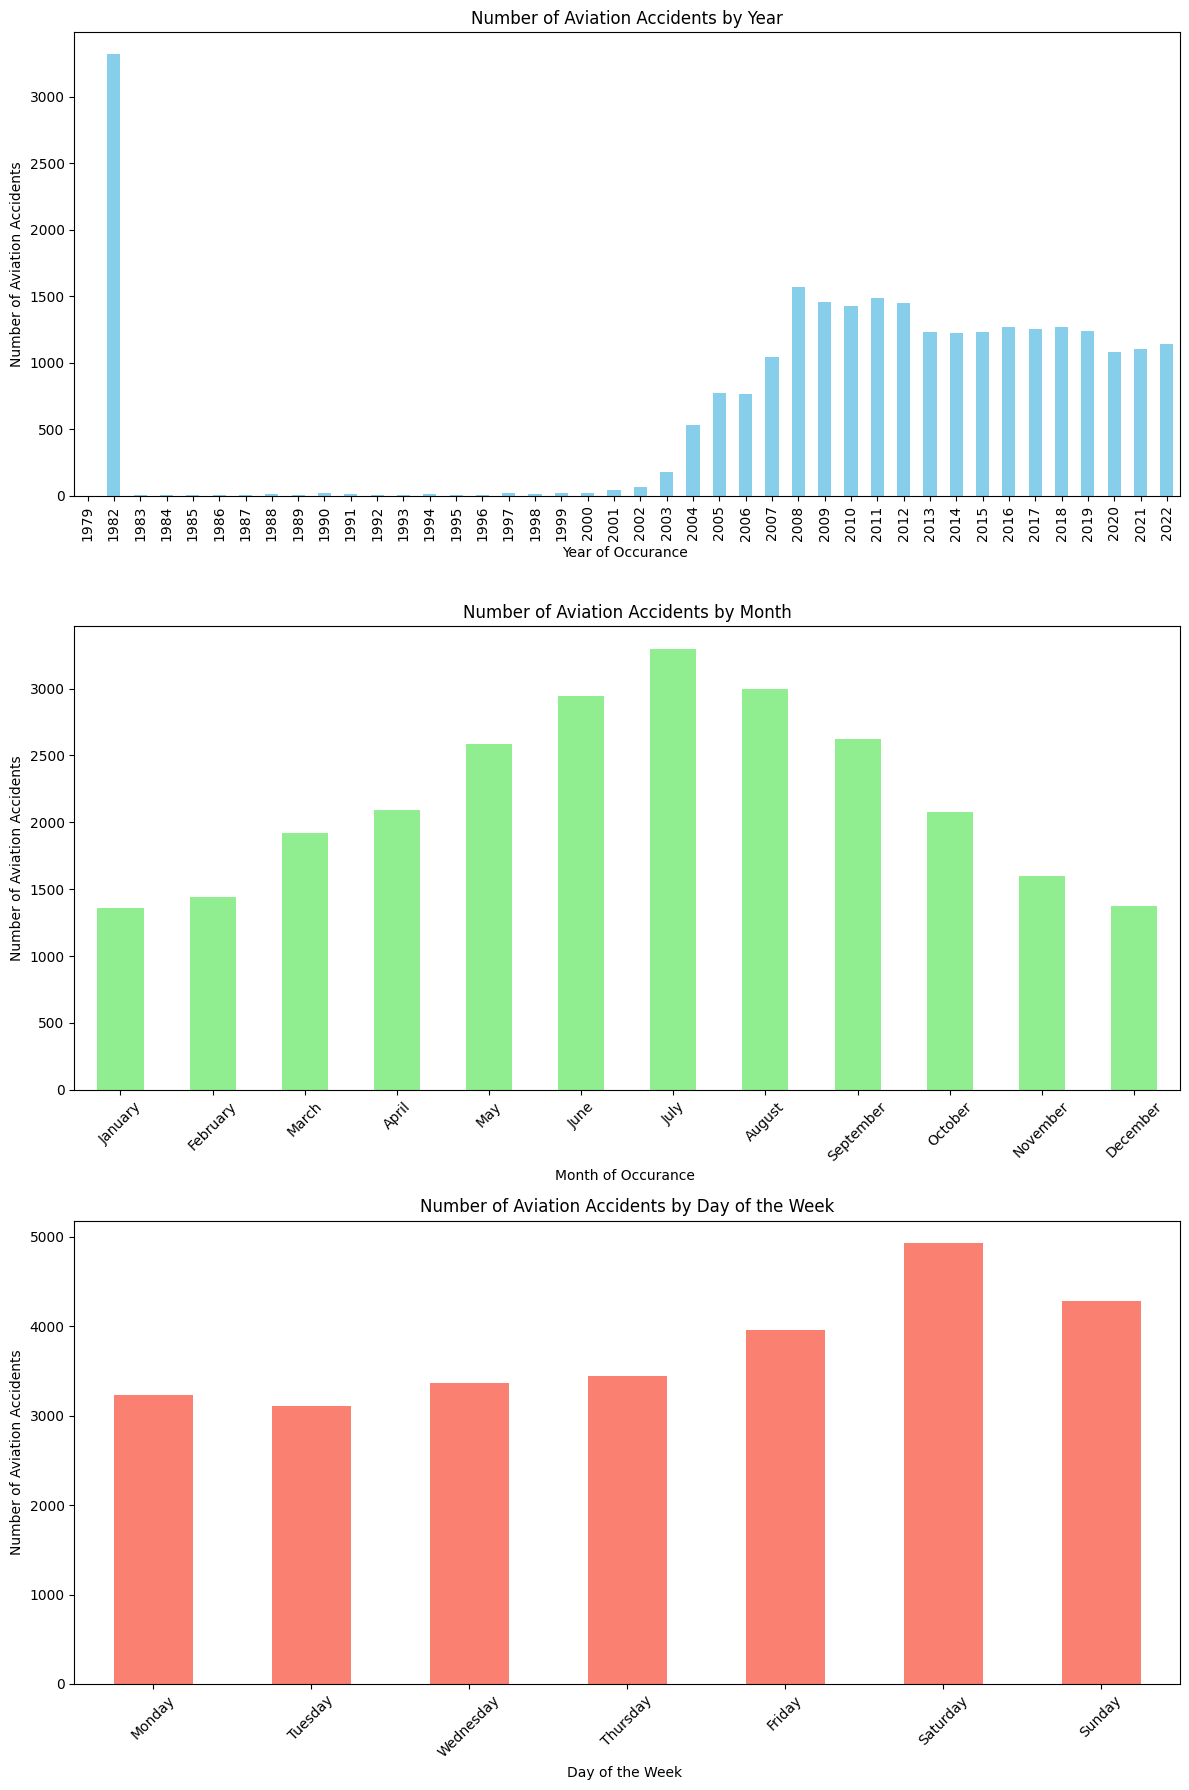

In [71]:
# Plotting the number of aviation accidents per year , per month and per day 
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

#plot  Aviation Accidents by year 
Accidents_by_Year.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Number of Aviation Accidents by Year')
axes[0].set_xlabel('Year of Occurance ')
axes[0].set_ylabel('Number of Aviation Accidents')

# Plot Aviation Accidents by Month 

Accidents_by_Month.plot(kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title('Number of Aviation Accidents by Month')
axes[1].set_xlabel('Month of Occurance ')
axes[1].set_ylabel('Number of Aviation Accidents')
axes[1].tick_params(axis='x', rotation=45)

# Plot Aviation Accidents by Day

Accidents_by_Day.plot(kind='bar', ax=axes[2], color='salmon')
axes[2].set_title('Number of Aviation Accidents by Day of the Week')
axes[2].set_xlabel('Day of the Week ')
axes[2].set_ylabel('Number of Aviation Accidents')
axes[2].tick_params(axis='x', rotation=45)

# Adjust layout for better spacing 

plt.tight_layout()

#show the plots 
plt.show()

Exploring the purpose of flights involved in Aviation Accidents 

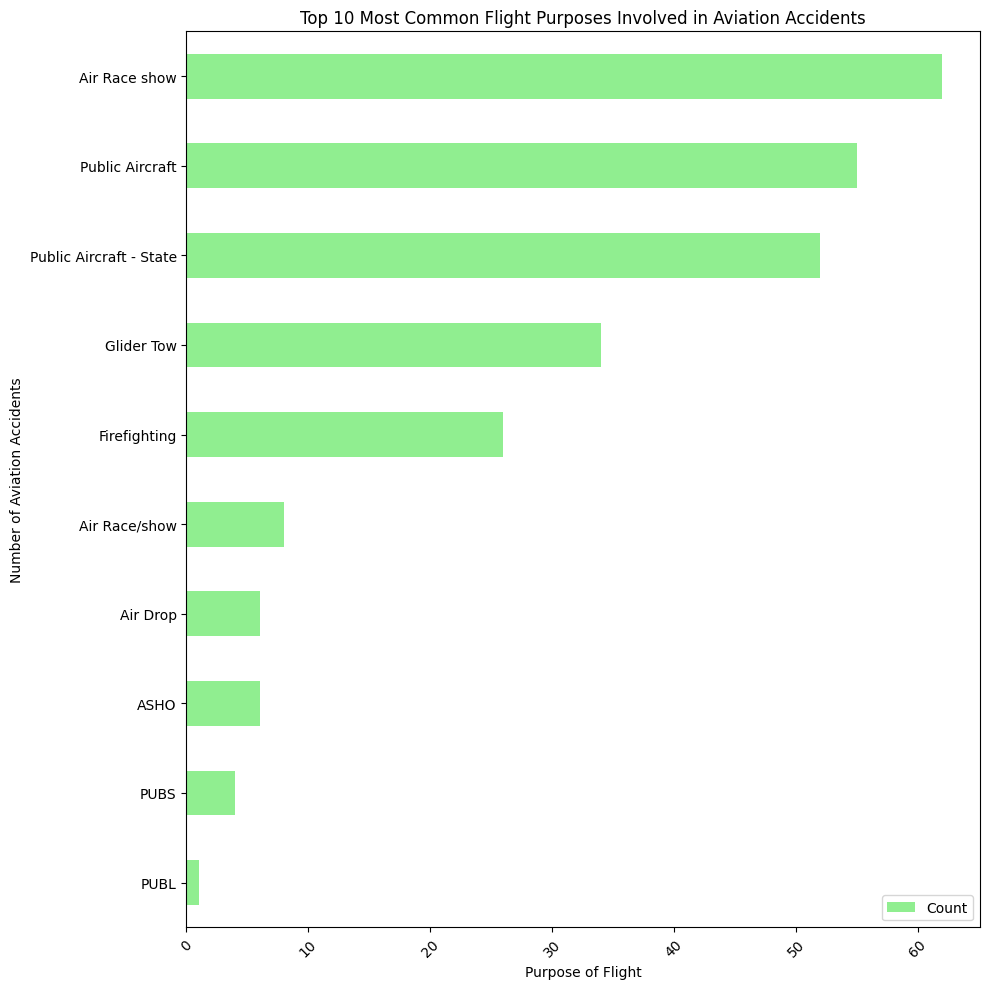

In [72]:
#Remove rows where Purpose.of.flight is 'Unknown'
Total_Accidents = usa_accidents_df[usa_accidents_df['Purpose.of.flight'] != 'Unknown']

# Group data by "Purpose.of.flight"
Flight_purpose = Total_Accidents.groupby('Purpose.of.flight').size().reset_index(name='Count')

# Sorting the data by count in descending order
Flight_purpose_sorted = Flight_purpose.sort_values('Count', ascending= True)

# Displaying the top 10 most common flight purposes involved in accidents

Flight_purpose_sorted.head(10)

# Plotting the top 10 most common flight purposes involved in accidents
fig, axes = plt.subplots(figsize=(10, 10))
Flight_purpose_sorted[:10].plot(kind='barh', x='Purpose.of.flight', y='Count', ax=axes, color='lightgreen')
axes.set_title('Top 10 Most Common Flight Purposes Involved in Aviation Accidents')  
axes.set_xlabel('Purpose of Flight')
axes.set_ylabel('Number of Aviation Accidents')
axes.tick_params(axis='x', rotation=45)

# Adjust layout for better spacing 
plt.tight_layout()

#show the plots 
plt.show()

Exploring the Airports in USA involved in Aviation Accidents 

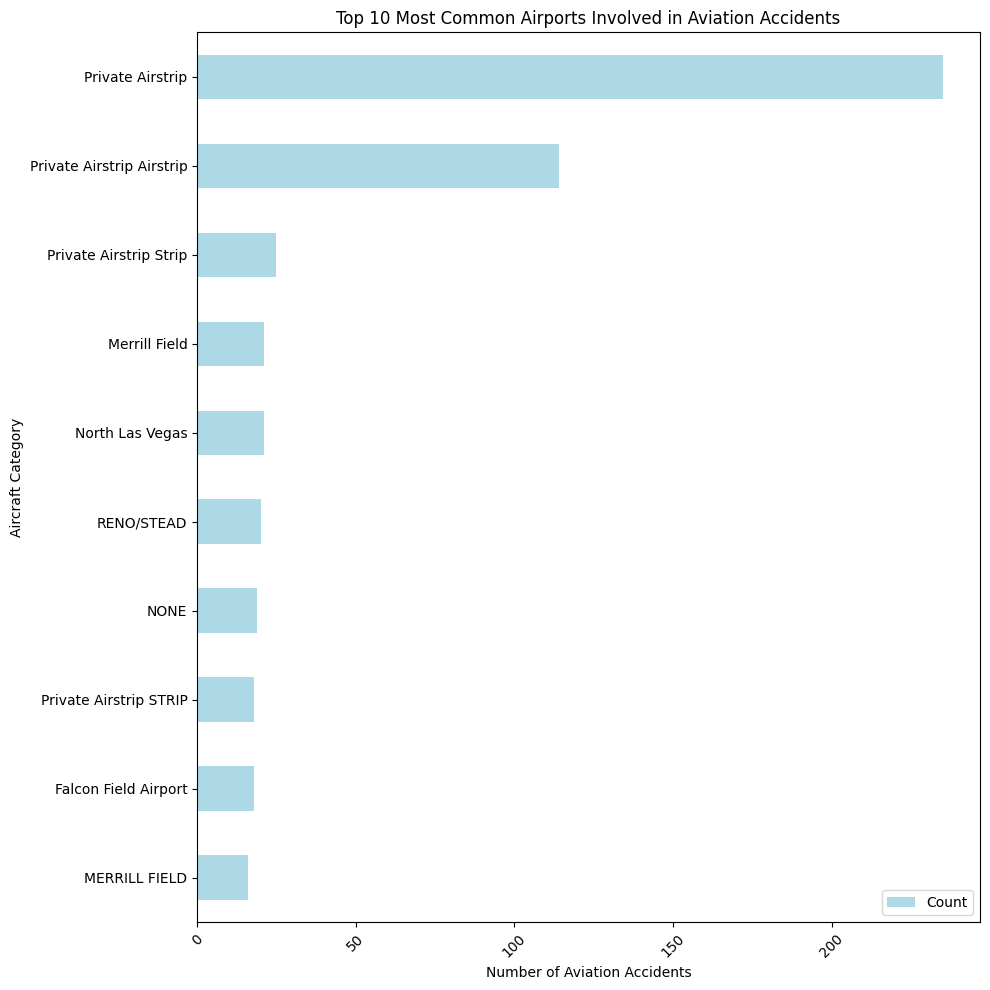

In [73]:
#Remove rows where Airport.Name is 'Unknown'
Airport_Accidents = usa_accidents_df[usa_accidents_df['Airport.Name'] != 'Unknown']

# Group data by "Airport Name"
Airport_Name = Airport_Accidents.groupby('Airport.Name').size().reset_index(name='Count')

# Sorting the data by count in descending order
Airport_Name_sorted = Airport_Name.sort_values('Count', ascending= False)

# Displaying the top 10 most common airports involved in accidents
Airport_Name_sorted.head(20)

# Plotting the top 10 most common aircraft airports involved in Aviation Accidents
fig, axes = plt.subplots(figsize=(10, 10))
Airport_Name_sorted[:10].plot(kind='barh', x='Airport.Name', y='Count', ax=axes, color='lightblue')
axes.set_title('Top 10 Most Common Airports Involved in Aviation Accidents')  
axes.set_xlabel('Number of Aviation Accidents')
axes.set_ylabel('Aircraft Category')
axes.tick_params(axis='x', rotation=45)

# Inverting the Y-axis to show the most frequent Airports involved in accidents on top 
axes.invert_yaxis()

# Adjust layout for better spacing
plt.tight_layout()

#show the plots
plt.show()


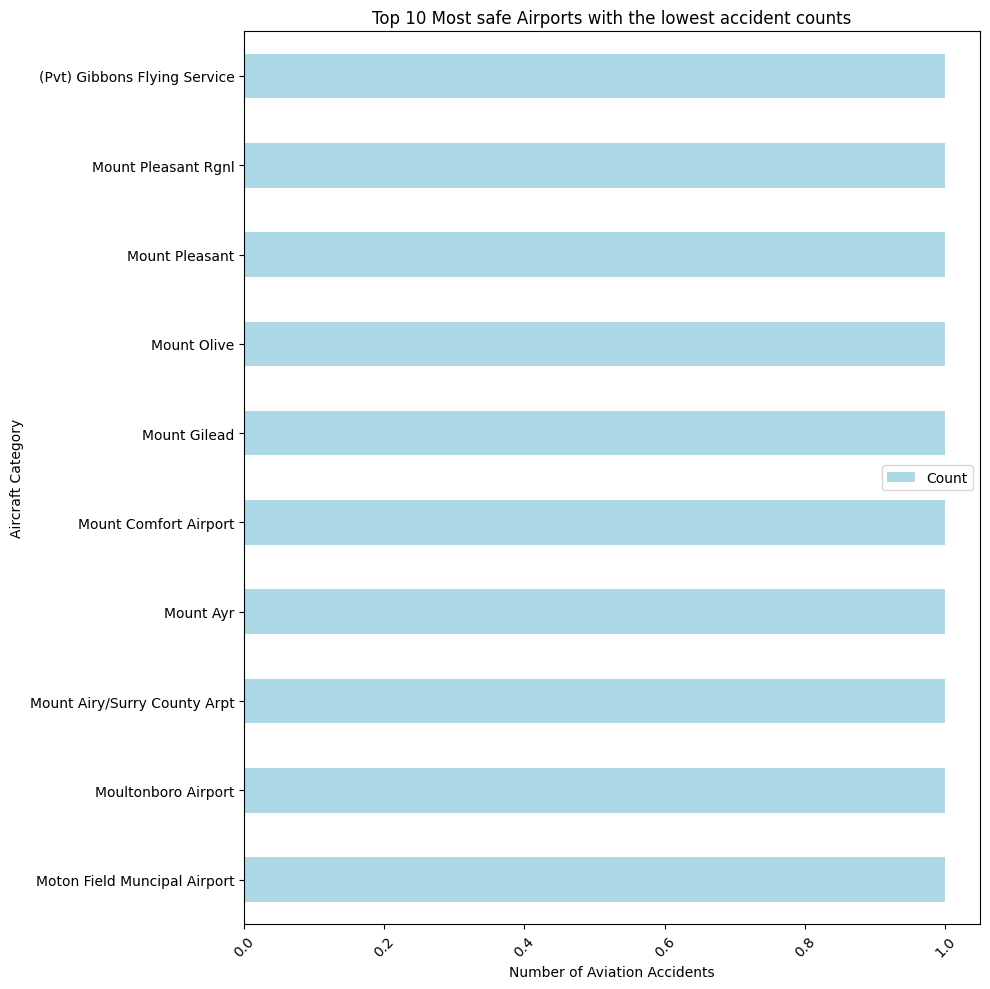

In [74]:
#Remove rows where Airport.Name is 'Unknown'
Airport_Accidents = usa_accidents_df[usa_accidents_df['Airport.Name'] != 'Unknown']

# Group data by "Airport Name"
Airport_Name = Airport_Accidents.groupby('Airport.Name').size().reset_index(name='Count')

# Sorting the data by count in descending order
Airport_Name_sorted = Airport_Name.sort_values('Count', ascending= False)


# Filter for airports with at least 1 accident and at most 10 accidents, then sort by count in ascending order (safest airports)
Airport_Name_filtered = Airport_Name[(Airport_Name['Count'] <= 10) & (Airport_Name['Count'] > 0)].sort_values(by='Count', ascending=True)

# Plotting the top 10 safest airports
fig, axes = plt.subplots(figsize=(10, 10))
Airport_Name_filtered[:10].plot(kind='barh', x='Airport.Name', y='Count', ax=axes, color='lightblue')
axes.set_title('Top 10 Most safe Airports with the lowest accident counts')  
axes.set_xlabel('Number of Aviation Accidents')
axes.set_ylabel('Aircraft Category')
axes.tick_params(axis='x', rotation=45)

# Inverting the Y-axis to show the most safe airports on top, with lowest accident counts  
axes.invert_yaxis()

# Adjust layout for better spacing
plt.tight_layout()

#show the plots
plt.show()

Exploring make and model involved in aviation accidents 

In [75]:
#Remove rows where Make is 'Unknown'
Total_Accidents = usa_accidents_df[usa_accidents_df['Make'] != 'Unknown']

# Group data by "Make" column
Make_clean = Total_Accidents.groupby('Make').size().reset_index(name='Count')

# Sorting the data by count in descending order
Make_sorted = Make_clean.sort_values('Count', ascending= False)

# Displaying the top 10 most common aviation Makes involved in accidents
Make_sorted.head(10)

,Make,Count
600,CESSNA,7638
2521,PIPER,4286
291,BEECH,1494
302,BELL,658
2260,MOONEY,387
380,BOEING,337
2748,ROBINSON,322
318,BELLANCA,279
1371,GRUMMAN,234
37,AERONCA,226


In [76]:
#Remove rows where Model is 'Unknown'
Total_Accidents = usa_accidents_df[usa_accidents_df['Model'] != 'Unknown']

# Group data by "Model" column
Model_clean = Total_Accidents.groupby('Model').size().reset_index(name='Count')

# Sorting the data by count in descending order
Model_sorted = Model_clean.sort_values('Count', ascending= False)

# Displaying the top 10 most common Aviation models  involved in accidents
Model_sorted.head(10)

,Model,Count
127,172,769
90,152,422
158,172N,304
200,182,287
165,172S,269
183,180,235
3612,PA28,230
73,150,223
3488,PA-28-140,219
157,172M,210


In [77]:
#Engine.Type 
#Remove rows where Engine Type is 'Unknown'
Total_Accidents = usa_accidents_df[usa_accidents_df['Engine.Type'] != 'Unknown']

# Group data by "Engine.Type" column
Engine_Type_clean = Total_Accidents.groupby('Engine.Type').size().reset_index(name='Count')

# Sorting the data by count in descending order
Engine_Type_sorted = Engine_Type_clean.sort_values('Count', ascending= False)

# Displaying the top 10 most common Engine types involved in accidents
Engine_Type_sorted.head(10)

,Engine.Type,Count
1,Reciprocating,21374
4,Turbo Prop,1163
5,Turbo Shaft,1149
2,Turbo Fan,488
3,Turbo Jet,115
0,Electric,6
6,UNK,1


In [78]:
pilot_accidents = usa_accidents_df[usa_accidents_df['Air.carrier'] == 'Pilot']
category_counts = pilot_accidents['Aircraft.Category'].value_counts()
print(category_counts)

Aircraft.Category
Airplane      220
Helicopter     11
Name: count, dtype: int64


In [79]:
# Air.carrier 
#Remove rows where Aircarrier  is 'Unknown' and Pilots beacuse it is an outlier 
Total_Accidents = usa_accidents_df[~usa_accidents_df['Air.carrier'].isin(['Unknown'])]

# Group data by "Air.carrier" column
Air_carrier_clean = Total_Accidents.groupby('Air.carrier').size().reset_index(name='Count')

# Sorting the data by count in descending order
Air_carrier_sorted = Air_carrier_clean.sort_values('Count', ascending= False)

# Displaying the top 10 most common Air.carrier  involved in accidents
Air_carrier_sorted.head(20)


,Air.carrier,Count
6726,Pilot,231
7714,SOUTHWEST AIRLINES CO,27
6214,ON FILE,24
758,American Airlines,24
8836,United Airlines,22
6797,Private Individual,20
2565,Delta Air Lines,19
8146,Southwest Airlines,17
306,AMERICAN AIRLINES INC,15
193,AIR METHODS CORP,15


Plotting top 10 aviation Make and Model involved in aviation accidents in USA 

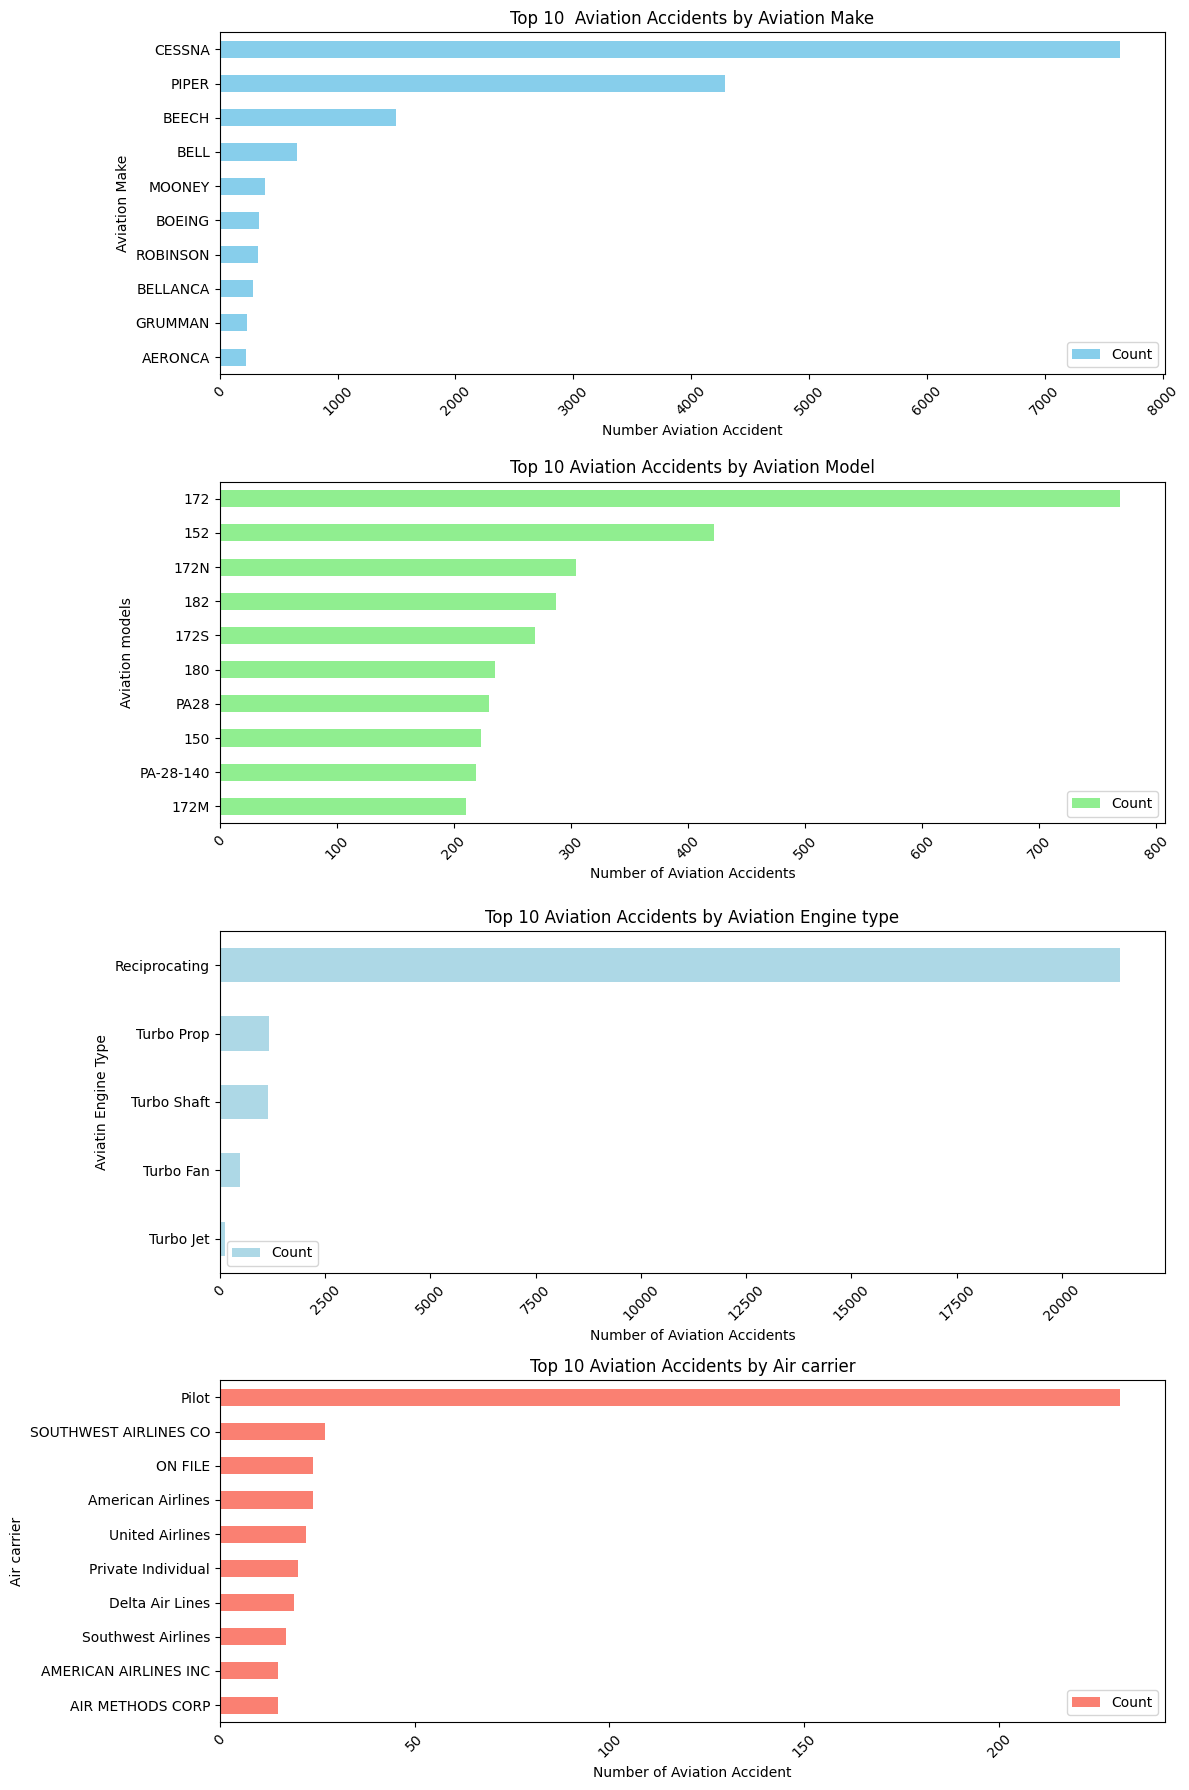

In [80]:
# Plotting the number of aviation accidents per Make and per Model involved 
fig, axes = plt.subplots(4, 1, figsize=(12, 18))
#plot  Aviation Accidents by  Aviation Make 
Make_sorted[:10].plot(kind='barh',x='Make', y='Count', ax=axes[0], color='skyblue')
axes[0].set_title('Top 10  Aviation Accidents by Aviation Make')
axes[0].set_xlabel('Number Aviation Accident')
axes[0].set_ylabel('Aviation Make')
axes[0].tick_params(axis='x', rotation=45)
axes[0].invert_yaxis()

#Plot of Aviation Accidents by Model of Aviation
Model_sorted[:10].plot(kind='barh',x='Model', y='Count', ax=axes[1], color='lightgreen')
axes[1].set_title('Top 10 Aviation Accidents by Aviation Model')
axes[1].set_xlabel('Number of Aviation Accidents')
axes[1].set_ylabel('Aviation models')
axes[1].tick_params(axis='x', rotation=45)
axes[1].invert_yaxis()

#Plot of Aviation Accidents by Aviation engine type
Engine_Type_sorted[:5].plot(kind='barh',x='Engine.Type', y='Count', ax=axes[2], color='lightblue')
axes[2].set_title('Top 10 Aviation Accidents by Aviation Engine type')
axes[2].set_xlabel('Number of Aviation Accidents')
axes[2].set_ylabel('Aviatin Engine Type')
axes[2].tick_params(axis='x', rotation=45)
axes[2].invert_yaxis()

#Plot of Aviation Accidents by Aircraft Cariier 
Air_carrier_sorted[:10].plot(kind='barh',x='Air.carrier', y='Count', ax=axes[3], color='salmon')
axes[3].set_title('Top 10 Aviation Accidents by Air carrier')
axes[3].set_xlabel('Number of Aviation Accident')
axes[3].set_ylabel('Air carrier')
axes[3].tick_params(axis='x', rotation=45)
axes[3].invert_yaxis()

# Adjust layout for better spacing
plt.tight_layout()

#show the plots
plt.show()

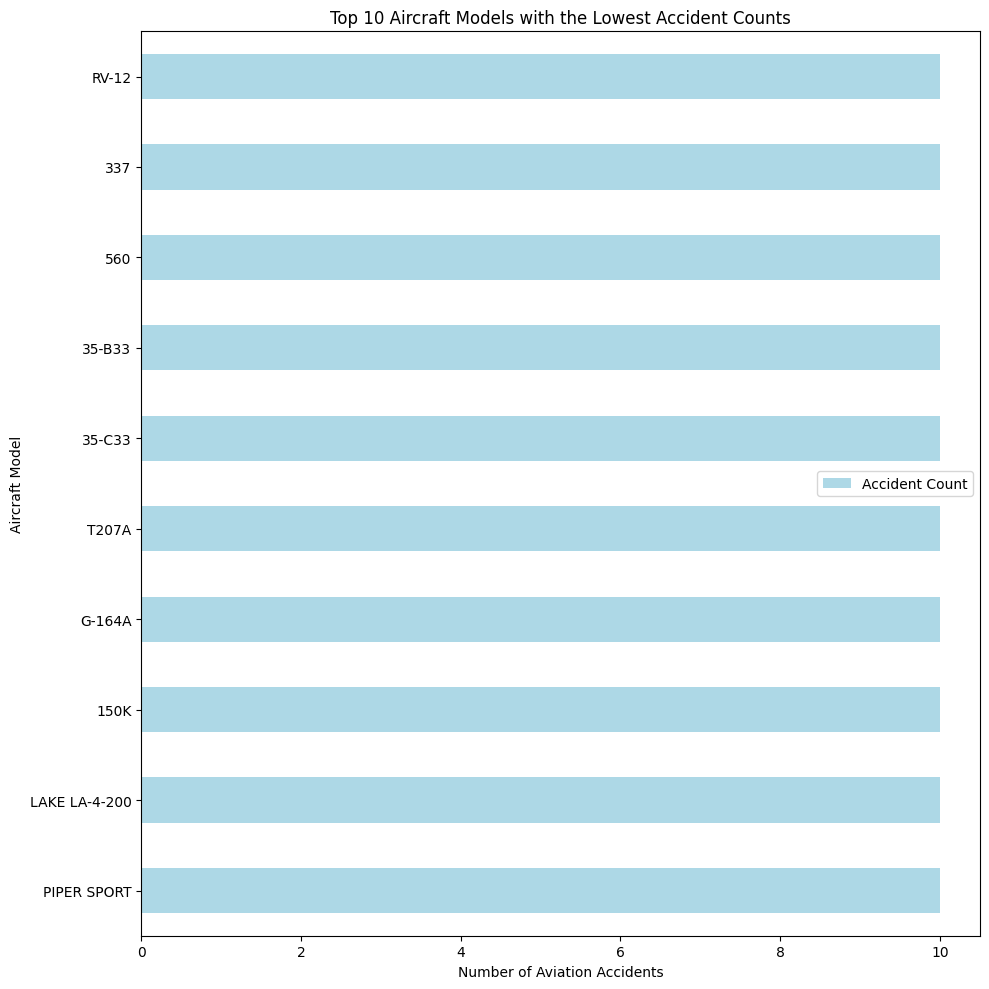

In [81]:
# Group by 'Make' and 'Model' and count the number of accidents
make_model_accidents = usa_accidents_df.groupby(['Make', 'Model']).size().reset_index(name='Accident Count')

# Filter for models that appear at least 10 times (for relevance) and get the models with the lowest accident counts
safest_aircraft_model = make_model_accidents[make_model_accidents['Accident Count'] >= 10].sort_values(by='Accident Count').head(10)

# Plotting the top 10 safest aircraft models with the lowest accident counts
fig, axes = plt.subplots(figsize=(10, 10))
safest_aircraft_model.plot(kind='barh', x='Model', y='Accident Count', ax=axes, color='lightblue')

axes.set_title('Top 10 Aircraft Models with the Lowest Accident Counts')  
axes.set_xlabel('Number of Aviation Accidents')
axes.set_ylabel('Aircraft Model')

# Inverting the Y-axis to show the safest models on top
axes.invert_yaxis()

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

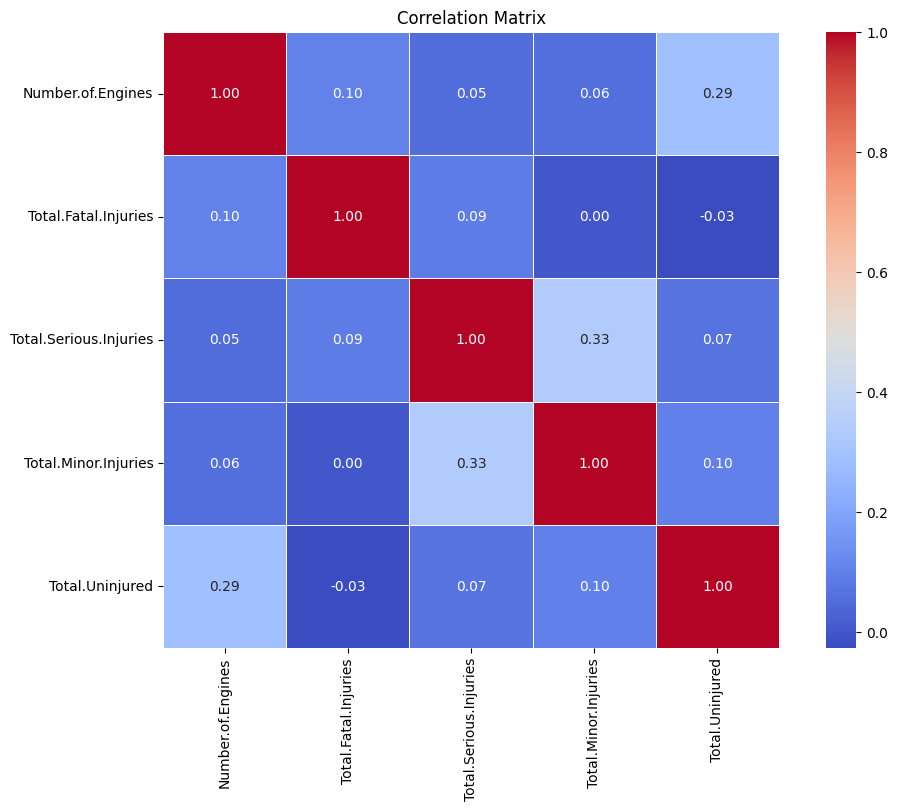

In [82]:
#Select only numeric columns
numeric_df = usa_accidents_df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

### Key Insights 

1. Highest risk for airplane and helicopter accidents in the USA
* Most accidents in visual metrological condition (VMC) when there is good visibility 
* Most accidents occur during the landing and takeoff broad phases of flights 
* Most accidents result in substantial aircraft damage 
* The highest purpose of flight involved in accidents is the air race shows 
* The highest number of aircraft accidents occur in private airstrips 
* The aviation make with the highest accident count is Cessna, the model is 172, and the Aviation Engine type of reciprocating 

2. Aeroplane and Helicopter accidents in the USA 
* There was a long period of no accidents from 1983  to 1996 when there were no reported accidents but from 2000 to 2008 there was a progressive increase, after that, there was a minimal reduction in the number of accidents.
* Most of the accidents occur in July  and during the weekend ( Saturday and Sunday)

3. Safest Aeroplane and airport 
* The safest airport is Pvt Gibson Flying Service 
* The Safest Airplane model is Ru 12
  
### Key recommendations
* Establish  operations from safer commercial airports
* Invest in safer Airplane models
* Develop robust risk mitigation plans on the critical phases of flights prone to accidents (landing and taking off).

### Future improvement 
* Further  workflow data analysis like the number of flights per Aviation model/Make and  flight distances to improve the risk prediction
* Incorporate also data on the number of flights attended per airport or airstrip to  improve the prediction of safety
* Review the cost of purchase and maintenance
* Conduct market analysis taking into consideration the insights 
